In [38]:
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation


In [39]:
# Generate synthetic data for linear and logistic regression
np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)


# Split data
indices = np.random.permutation(len(X))
train_idx, test_idx, valid_idx = indices[:60], indices[60:80], indices[80:]
X_train, X_test, X_valid = X[train_idx], X[test_idx], X[valid_idx]
y_train, y_test, y_valid = y[train_idx], y[test_idx], y[valid_idx]

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")


X_train shape: (60, 1)
y_train shape: (60, 1)
X_test shape: (20, 1)
y_test shape: (20, 1)
X_valid shape: (20, 1)
y_valid shape: (20, 1)


##Linear Regression

In [40]:
# Implement Linear Regression
class LinearRegression:
    def __init__(self, learning_rate=0.1, num_iterations=1000, lambda_reg=0.1):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.lambda_reg = lambda_reg
        self.theta = None
        self.cost_history = []

    def compute_cost(self, X, y):
        m = len(X)
        prediction = X.dot(self.theta) # X * theta = y
        regularizer = (self.lambda_reg/(2*m)) * np.sum(np.square(self.theta))
        return (1/(2*m)) * np.sum(np.square(prediction - y)) + regularizer

    def gradient_descent(self, X, y):
        m = len(X)
        self.theta = np.random.randn(X.shape[1], 1)
        self.cost_history = np.zeros(self.num_iterations)

        for i in range(self.num_iterations):
            gradients = (1/m) * X.T.dot(X.dot(self.theta) - y) + (self.lambda_reg/m) * self.theta
            self.theta -= self.learning_rate * gradients
            self.cost_history[i] = self.compute_cost(X, y)

    def fit(self, X, y):
        X_b = np.c_[np.ones((len(X), 1)), X]
        self.gradient_descent(X_b, y)

    def predict(self, X):
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.theta)

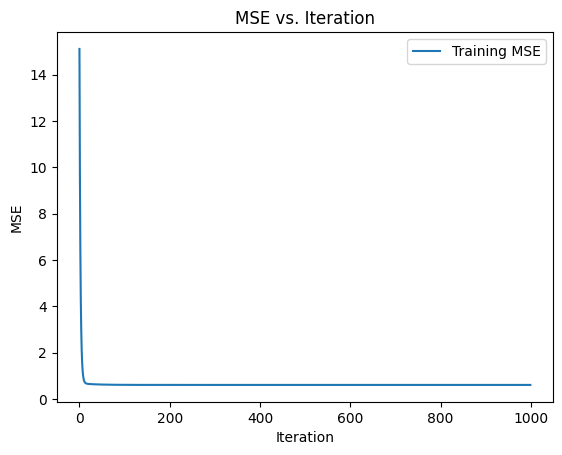

Training Error: 0.6068484252574063
Validation Error: 0.40295265066239494
The model seems fine.


In [41]:
# Initialize and train the model
model = LinearRegression(learning_rate=0.1, num_iterations=1000, lambda_reg=0.1)
model.fit(X_train, y_train)

# Make predictions
linear_train_predictions = model.predict(X_train)
linear_valid_predictions = model.predict(X_valid)

# Visualize the MSE
plt.plot(model.cost_history, label="Training MSE")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE vs. Iteration")
plt.legend()
plt.show()

# Check for overfitting
training_error = model.compute_cost(np.c_[np.ones((len(X_train), 1)), X_train], y_train)
validation_error = model.compute_cost(np.c_[np.ones((len(X_valid), 1)), X_valid], y_valid)

print(f"Training Error: {training_error}")
print(f"Validation Error: {validation_error}")

if validation_error > training_error:
    print("The model might be overfitting!")
else:
    print("The model seems fine.")

##Logistic Regression

In [42]:
# Implement Logistic Regression
class LogisticRegression:
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None
        self.cost_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        m = len(X)
        predictions = self.sigmoid(X.dot(self.theta))
        return -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    def gradient_descent(self, X, y):
        m = len(X)
        self.theta = np.random.randn(X.shape[1], 1)
        self.cost_history = np.zeros(self.num_iterations)

        for i in range(self.num_iterations):
            predictions = self.sigmoid(X.dot(self.theta))
            gradients = (1/m) * X.T.dot(predictions - y)
            self.theta -= self.learning_rate * gradients
            self.cost_history[i] = self.compute_cost(X, y)

    def fit(self, X, y):
        X_b = np.c_[np.ones((len(X), 1)), X]
        self.gradient_descent(X_b, y)

    def predict(self, X):
        X_b = np.c_[np.ones((len(X), 1)), X]
        return self.sigmoid(X_b.dot(self.theta))

    def check_overfitting(self, X_train, y_train, X_valid, y_valid):
        X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
        X_b_valid = np.c_[np.ones((len(X_valid), 1)), X_valid]

        training_cost = self.compute_cost(X_b_train, y_train)
        validation_cost = self.compute_cost(X_b_valid, y_valid)

        print(f"Training Cost: {training_cost}")
        print(f"Validation Cost: {validation_cost}")

        if validation_cost > training_cost:
            print("The model might be overfitting!")
        else:
            print("The model seems fine.")


###Based on original data
Logistic Regression based on the original data we generated in previous section

In [43]:
# Process the data we generated before
# Those data cannot be used by logistic regression directly
# We need to convert continuous values to binary labels
def to_binary_labels(y, threshold):
    return (y > threshold).astype(int)

# Convert original y-values to binary labels
threshold = 6  # You can choose a different threshold
y_train_binary = to_binary_labels(y_train, threshold)
y_valid_binary = to_binary_labels(y_valid, threshold)

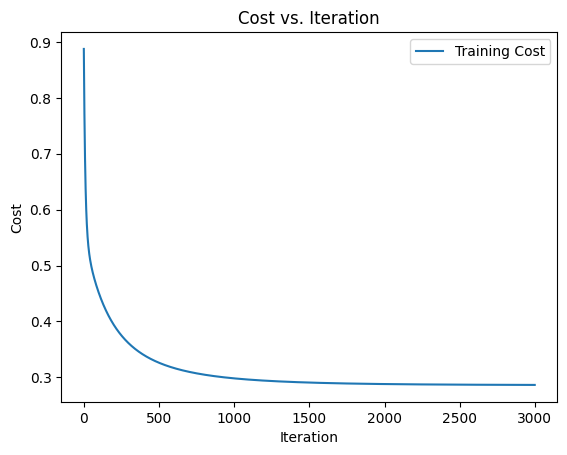

Training Cost: 0.2864040806863955
Validation Cost: 0.11939648711444112
The model seems fine.


In [44]:
# Initialize and train the model
model = LogisticRegression(learning_rate=0.1, num_iterations=3000)
model.fit(X_train, y_train_binary)  # Assuming y_train_binary contains binary labels

# Make predictions
logistic_train_predictions = model.predict(X_train)
logistic_valid_predictions = model.predict(X_valid)

# Visualize the cost
plt.plot(model.cost_history, label="Training Cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs. Iteration")
plt.legend()
plt.show()

# Check for overfitting
X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_valid = np.c_[np.ones((len(X_valid), 1)), X_valid]

training_cost = model.compute_cost(X_b_train, y_train_binary)
validation_cost = model.compute_cost(X_b_valid, y_valid_binary)

print(f"Training Cost: {training_cost}")
print(f"Validation Cost: {validation_cost}")

if validation_cost > training_cost:
    print("The model might be overfitting!")
else:
    print("The model seems fine.")

###Based on predicted data
Use Logistic Regression based on the predicted data generated by the Linear Regression from the previous section

In [45]:
# Convert predicted y-values to binary labels
threshold = 6  # You can choose a different threshold
train_predictions_binary = to_binary_labels(linear_train_predictions, threshold)
valid_predictions_binary = to_binary_labels(linear_valid_predictions, threshold)

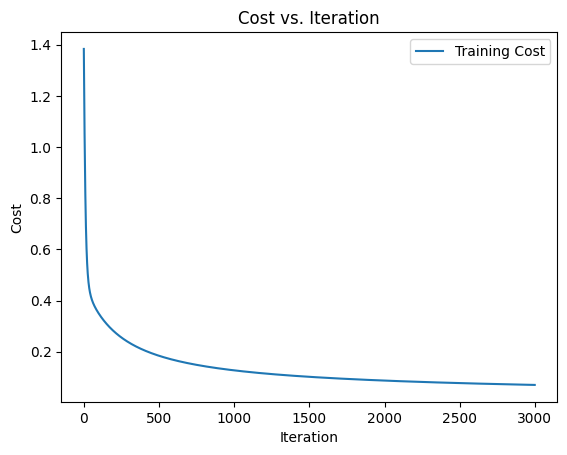

Training Cost: 0.31815886063040943
Validation Cost: 0.057362245947641846
The model seems fine.


In [46]:
# Initialize and train the model
model = LogisticRegression(learning_rate=0.1, num_iterations=3000)
model.fit(X_train, train_predictions_binary)  # Assuming y_train_binary contains binary labels

# Make predictions
logistic_train_predictions = model.predict(X_train)
logistic_valid_predictions = model.predict(X_valid)

# Visualize the cost
plt.plot(model.cost_history, label="Training Cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs. Iteration")
plt.legend()
plt.show()

# Check for overfitting
X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_valid = np.c_[np.ones((len(X_valid), 1)), X_valid]

training_cost = model.compute_cost(X_b_train, y_train_binary)
validation_cost = model.compute_cost(X_b_valid, y_valid_binary)

print(f"Training Cost: {training_cost}")
print(f"Validation Cost: {validation_cost}")

if validation_cost > training_cost:
    print("The model might be overfitting!")
else:
    print("The model seems fine.")